In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=5c5847415fcbb2ff448e1c8608b6a1454a23ffe619527cb35bb5c8f57f183933
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=b5eaca9bb9d953b9b6ea99741faac5ac0f35eb81857c216b66aaf03f1396acf8
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn import tree
import xgboost as xgb

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import svd
import umap

from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter,filterwarnings
simplefilter("ignore", category=ConvergenceWarning)
simplefilter(action='ignore')
filterwarnings("ignore")

ALL=pd.read_csv('students_adaptability_level_online_education.csv')
Y=ALL['Adaptivity Level']
X=ALL.drop(columns='Adaptivity Level')

In [ ]:
ALL.head(7)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low


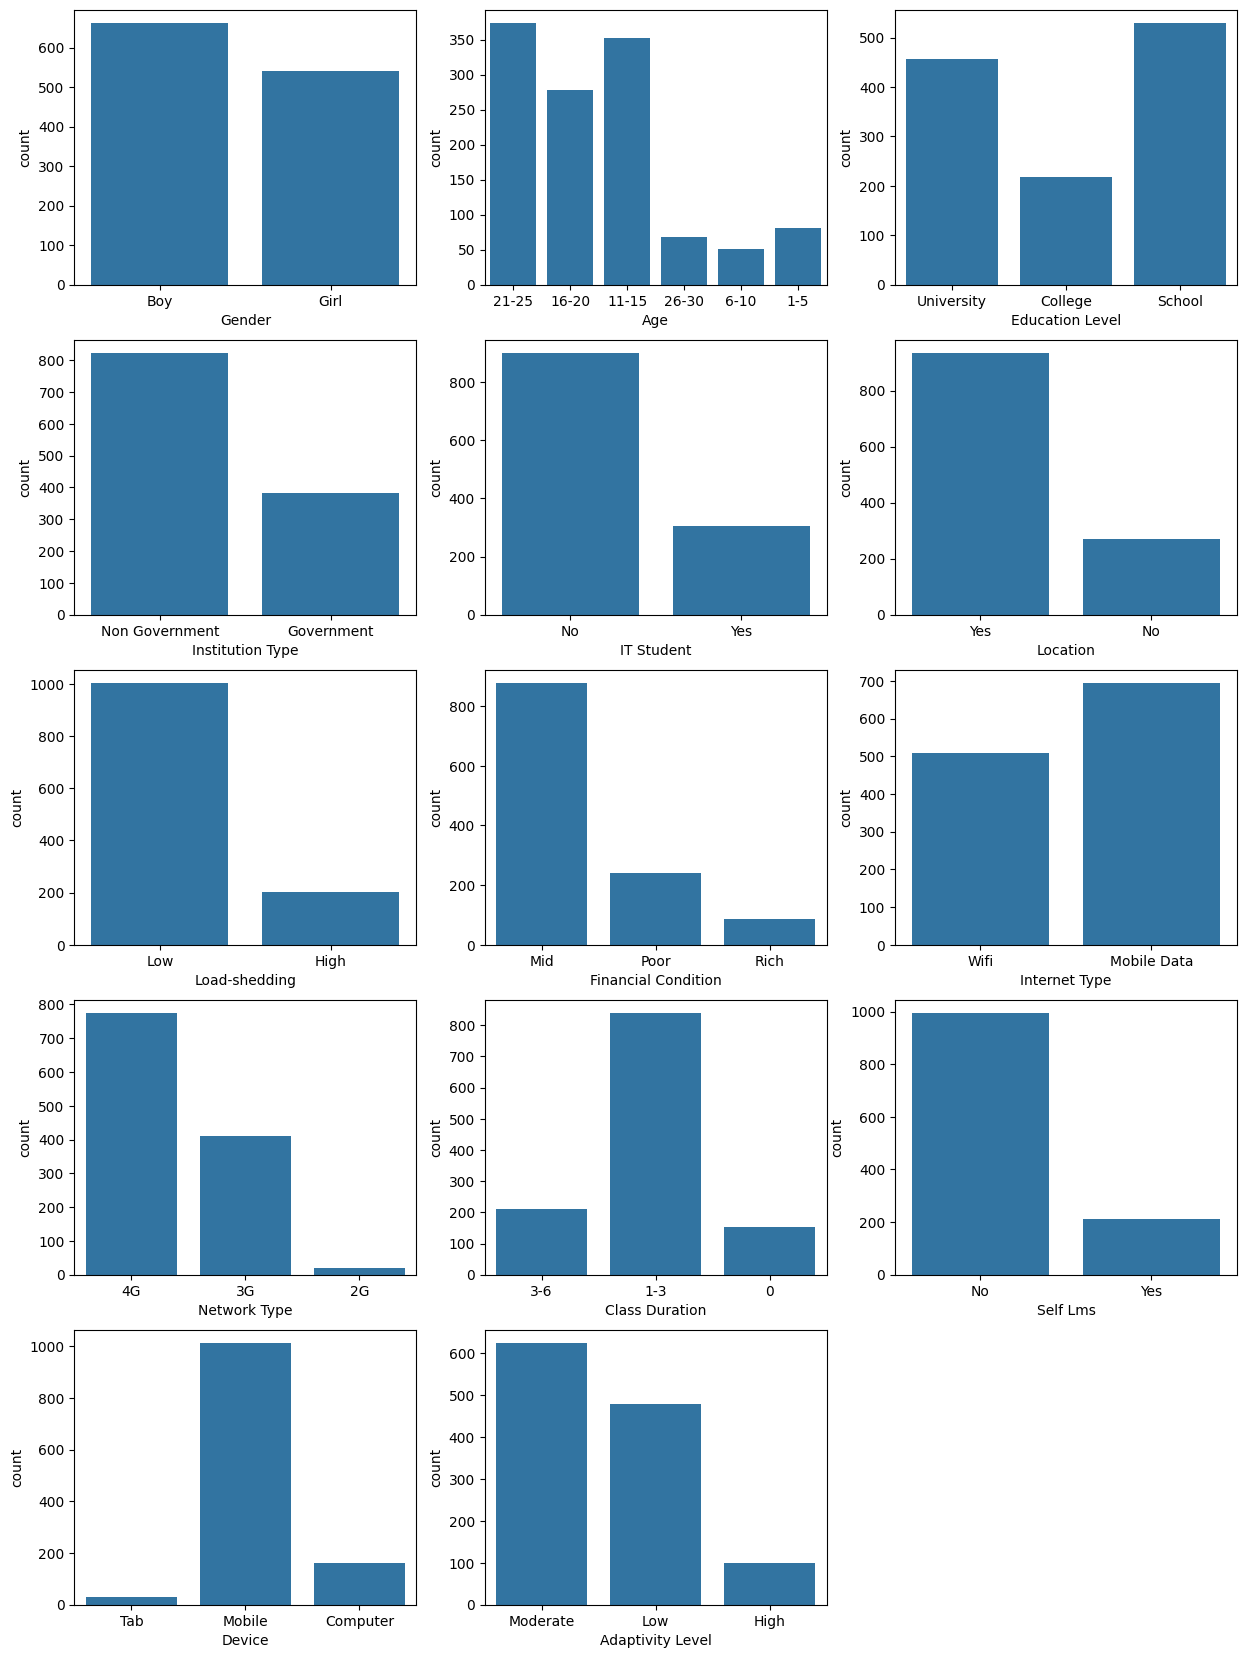

In [ ]:
i = 1
plt.figure(figsize = (15,25))
for feature in  ALL :
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = ALL)
    i +=1

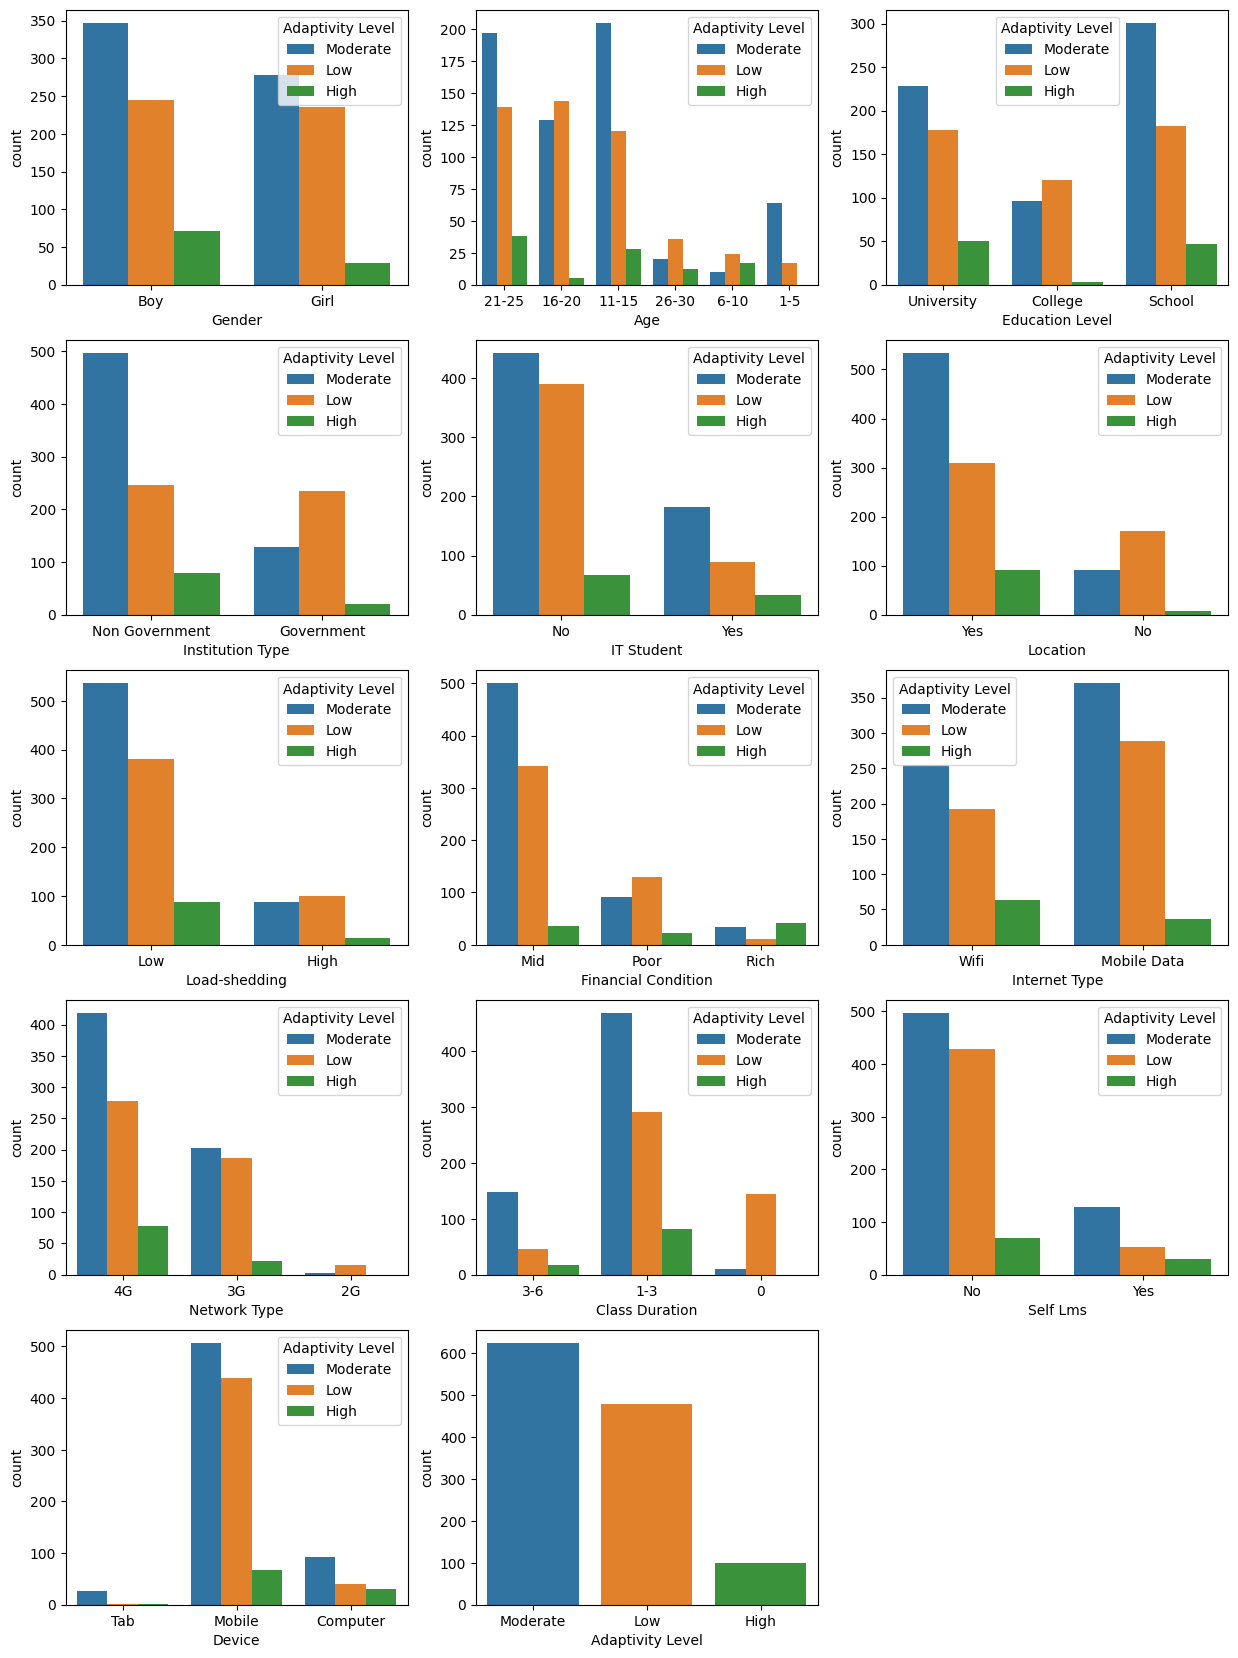

In [ ]:
i = 1
plt.figure(figsize = (15,25))
for feature in ALL:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = ALL)
    i +=1

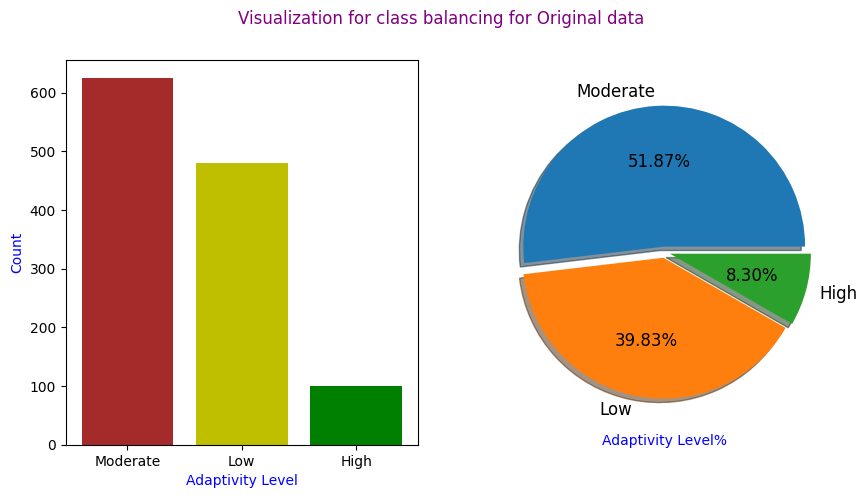

In [ ]:
def pl(Y,tx=''):
    fig=plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.bar(Y.squeeze().unique(),Y.value_counts(),color=['brown','y','g'])
    plt.xlabel('Adaptivity Level',c='b')
    plt.ylabel('Count',c='b')


    plt.subplot(122)
    plt.pie(Y.value_counts(),labels=Y.squeeze().unique(),explode = (0.04, 0.04, 0.04),shadow=True,autopct='%1.2f%%',textprops={'color':'black','size': 'large'})
    plt.xlabel('Adaptivity Level%',c='b')
    if tx!='':
        fig.suptitle('Visualization for class balancing {}'.format(tx),c='purple')
    else:fig.suptitle('Visualization for class balancing',c='purple')
    plt.show()
pl(Y,tx='for Original data')


Dataset nulls:
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


                     Chi-squared test for features

Gender p-value of the chi2-test is: 0.12%

Age p-value of the chi2-test is: 0.0%

Education Level p-value of the chi2-test is: 0.0%

Institution Type p-value of the chi2-test is: 0.0%

IT Student p-value of the chi2-test is: 0.0056%

Location p-value of the chi2-test is: 0.0%

Load-shedding p-value of the chi2-test is: 0.6833%

Financial Condition p-value of the chi2-test is: 0.0%

Internet Type p-value of the chi2-test is: 0.0027%

Network Type p-value of the chi2-test is: 0.0004%

Class Duration p-value of the chi2-test is: 0.0%

Self Lms p-value of the chi2-

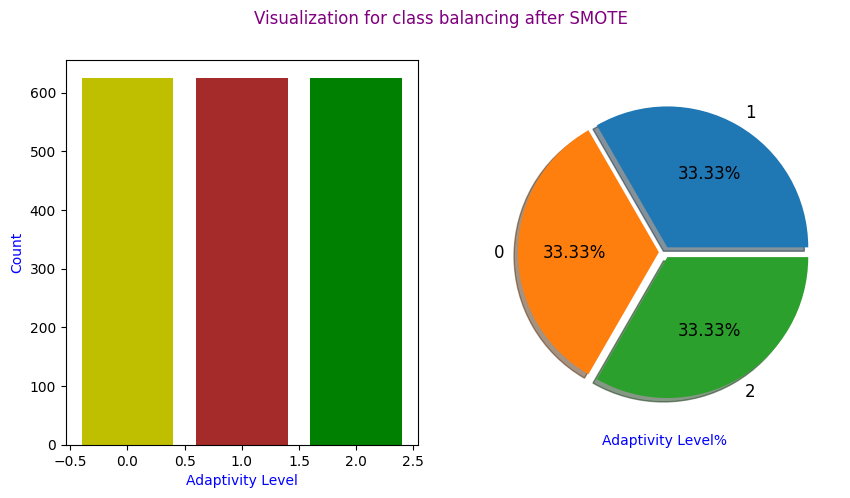

In [ ]:
print('\nDataset nulls:\n',ALL.isna().sum(),'\n\n',sep='')

print(f"{'Chi-squared test for features' : >50}")
for i in range(X.shape[1]):
    A=pd.crosstab(index=ALL.iloc[:,i], columns=Y)
    p = chi2_contingency(A)
    print('\n',X.columns[i],' p-value of the chi2-test is: ',round(p[1]*100,4),'%',sep='')

X=pd.get_dummies(X)
Y=pd.DataFrame(Y.map({'Low':0,'Moderate':1,'High':2}))

X_smote,y_smote=SMOTE().fit_resample(X,Y)
pl(y_smote,tx='after SMOTE')

In [ ]:
pd.set_option('display.max_columns', None)
X.head(7)

,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0
3,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0
5,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
6,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.25)
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,stratify=y_smote,test_size=0.25)

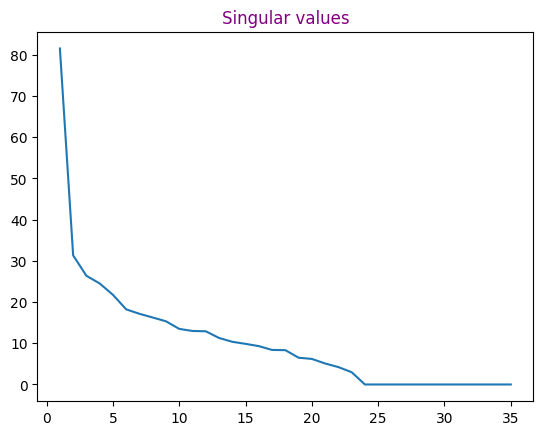

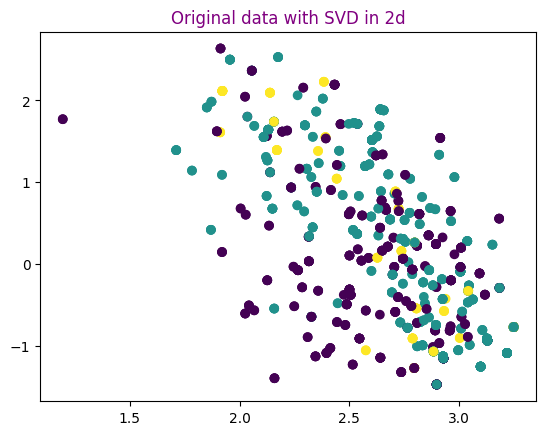

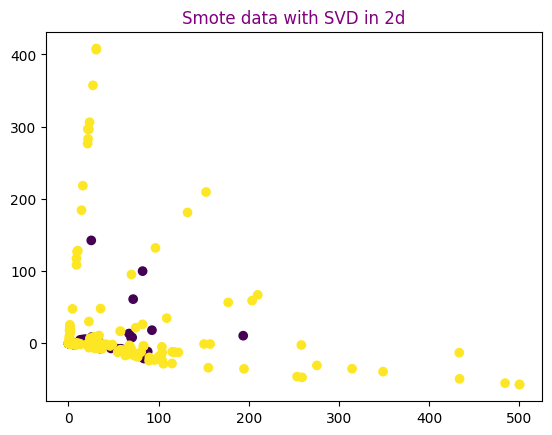

In [ ]:
X_train_svd=svd(X_train)
#checking for best numbers or sigmas (n=4 and n=22 best)
plt.plot(np.linspace(1,X_train_svd[1].shape[0],X_train_svd[1].shape[0]),X_train_svd[1])
plt.title('Singular values',c='purple')
plt.show()
#plot for reduction in 2d
a=TruncatedSVD()
b=a.fit_transform(X)
plt.scatter(b[:,0],b[:,1],c=Y.squeeze())
plt.title('Original data with SVD in 2d',c='purple')
plt.show()

X_train_svd_smote=svd(X_train_smote)
c=TruncatedSVD()
d=c.fit_transform(X_smote)
plt.scatter(d[:,0],d[:,1],c=y_smote.squeeze())
plt.title('Smote data with SVD in 2d',c='purple')
plt.show()

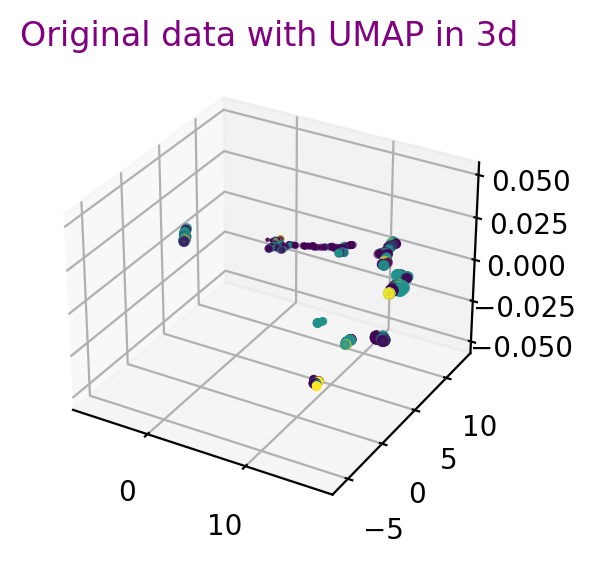

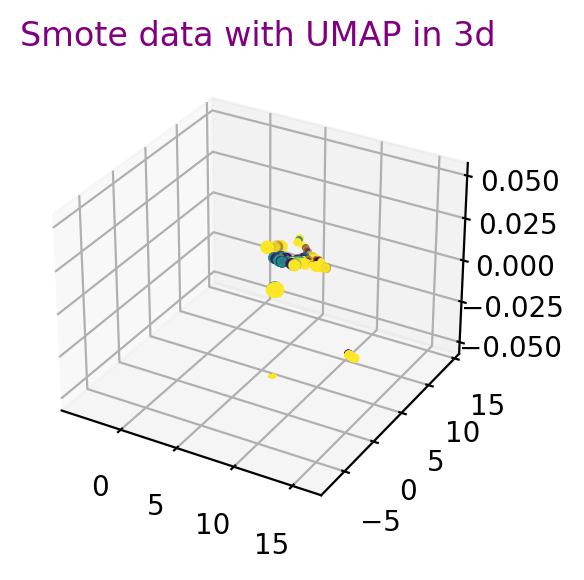

In [ ]:
Xumap=umap.UMAP(n_components=3,n_jobs=-1).fit_transform(X)
plt.figure(figsize=(5,3),dpi=200)
plt.axes(projection ="3d")
plt.scatter(Xumap[:,0],Xumap[:,1],Xumap[:,2],c=Y.squeeze())
plt.xlim([min(Xumap[:,0]),max(Xumap[:,0])])
plt.ylim([min(Xumap[:,1]),max(Xumap[:,1])])
plt.title('Original data with UMAP in 3d',c='purple')
plt.show()
X_train_umap=Xumap[X_train.index]
X_test_umap=Xumap[X_test.index]
y_train_umap=y_train
y_test_umap=y_test

Xsmoteumap=umap.UMAP(n_components=3,n_jobs=-1).fit_transform(X_smote)
plt.figure(figsize=(5,3),dpi=200)
plt.axes(projection ="3d")
plt.scatter(Xsmoteumap[:,0],Xsmoteumap[:,1],Xsmoteumap[:,2],c=y_smote.squeeze())
plt.xlim([min(Xsmoteumap[:,0]),max(Xsmoteumap[:,0])])
plt.ylim([min(Xsmoteumap[:,1]),max(Xsmoteumap[:,1])])
plt.title('Smote data with UMAP in 3d',c='purple')
plt.show()

X_train_umap_smote=Xsmoteumap[X_train_smote.index]
X_test_umap_smote=Xsmoteumap[X_test_smote.index]
y_train_umap_smote=y_train_smote
y_test_umap_smote=y_test_smote

In [ ]:
models=['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier','Random Forest Classifier','Extra Trees Classifier','Xgboost Classifier']
def runmodels(X_train,y_train,X_test,y_test,k=1):
    simplefilter("ignore", category=ConvergenceWarning)
    filterwarnings("ignore")
    model=[LogisticRegression(),KNeighborsClassifier(),tree.DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),xgb.XGBClassifier(verbosity = 0,use_label_encoder=False)]
    models=['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier','Random Forest Classifier','Extra Trees Classifier','Xgboost Classifier']
    scores=[]
    a=pd.DataFrame()
    i=0
    for m in model:
        my=m.fit(X_train,y_train)
        scores.append(my.score(X_test,y_test))
        if k==1:
            print('\n',models[i],sep='')

            print(classification_report(y_test,my.predict(X_test)))
            if str(m) in ['DecisionTreeClassifier()']:
                plt.figure(dpi=300)
                tree.plot_tree(my)
                plt.show()
        if str(m) in ['DecisionTreeClassifier()','RandomForestClassifier()','ExtraTreesClassifier()']:
            a[models[i]]=my.feature_importances_
        i+=1
    if a.shape[0]==len(X.columns):
        a=a.set_index(X.columns)
    return scores,a

def trpl(fi):
    for i in ['Decision Tree Classifier','Random Forest Classifier','Extra Trees Classifier']:
        plt.barh(fi[i].sort_values(ascending=False).index[:5][::-1],fi[i].sort_values(ascending=False)[:5][::-1]*100, color='#0000EE')
        plt.title('5 most important features for {}'.format(i))
        plt.xticks(np.arange(2,max((fi[i].sort_values(ascending=False)[:5][::-1]*100).round(0))+3,2),labels=['{}%'.format(int(i)) for i in np.arange(2,max((fi[i].sort_values(ascending=False)[:5][::-1]*100).round(0))+3,2)])
        plt.show()


Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       120
           1       0.70      0.85      0.77       157
           2       0.92      0.44      0.59        25

    accuracy                           0.72       302
   macro avg       0.79      0.63      0.68       302
weighted avg       0.73      0.72      0.72       302


KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       120
           1       0.80      0.87      0.83       157
           2       0.73      0.44      0.55        25

    accuracy                           0.81       302
   macro avg       0.79      0.70      0.73       302
weighted avg       0.81      0.81      0.80       302


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.92      0.93      0.93       157
     

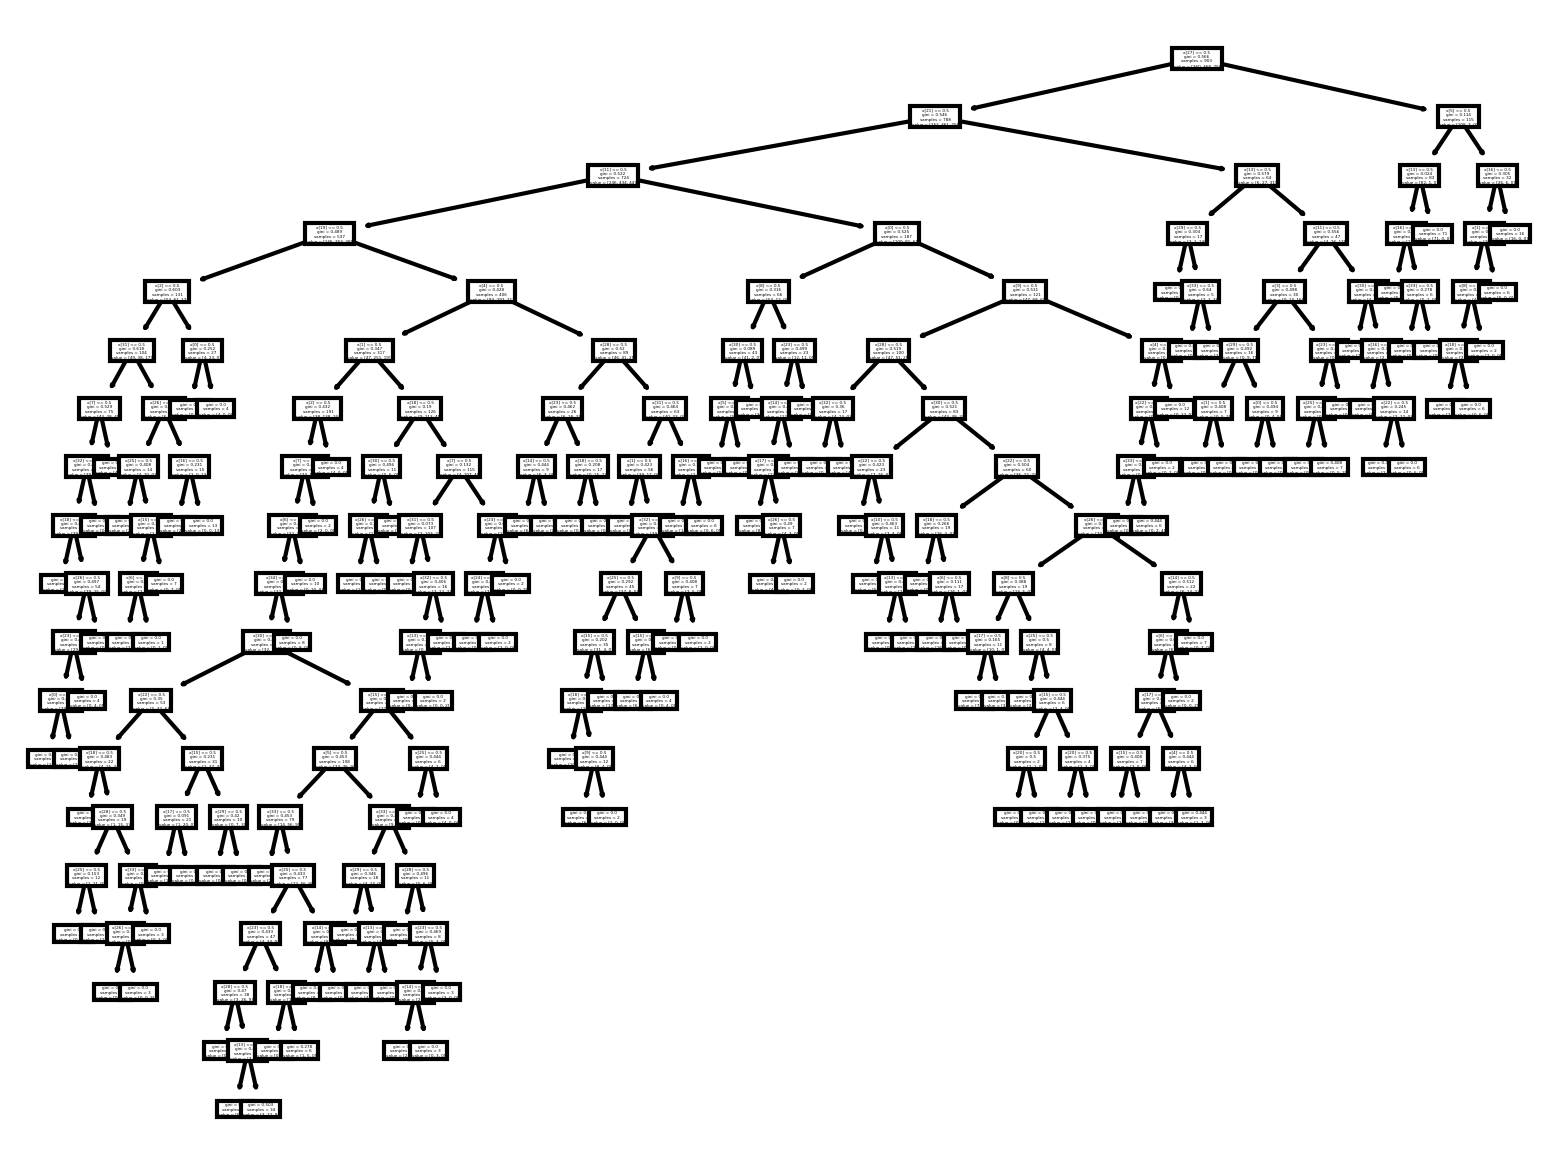


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       120
           1       0.90      0.94      0.92       157
           2       0.86      0.76      0.81        25

    accuracy                           0.91       302
   macro avg       0.90      0.87      0.88       302
weighted avg       0.91      0.91      0.91       302


Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.92      0.93      0.93       157
           2       0.86      0.76      0.81        25

    accuracy                           0.92       302
   macro avg       0.90      0.87      0.89       302
weighted avg       0.92      0.92      0.92       302


Xgboost Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.92      0.93      0.93       157
     

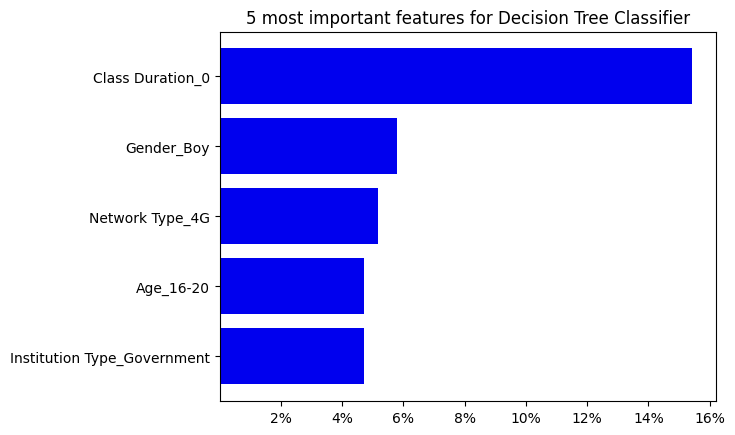

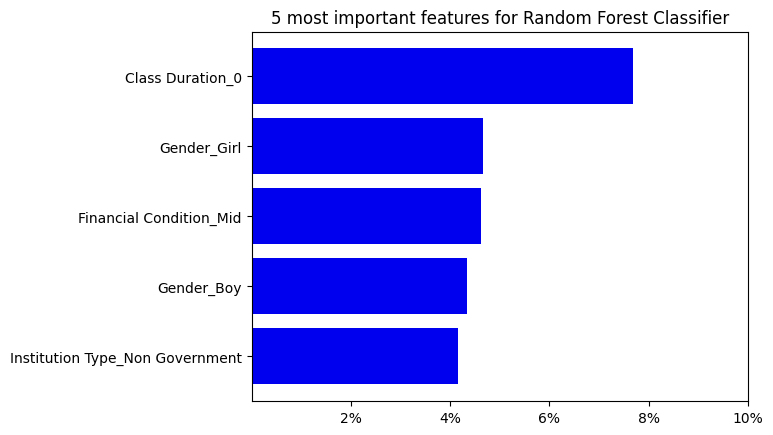

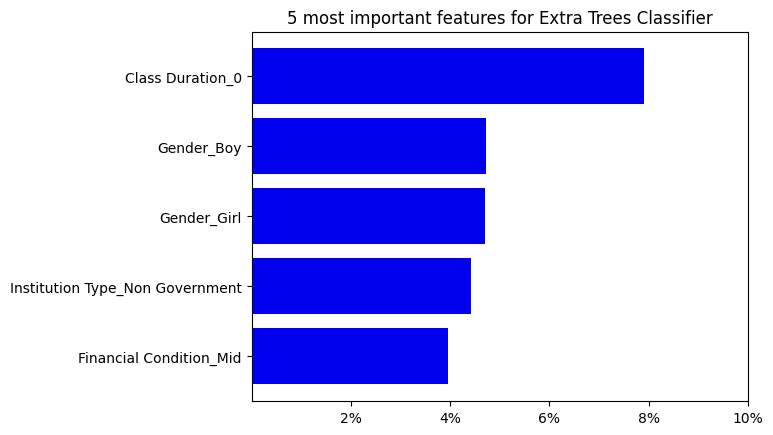

In [ ]:
original,original_fi=runmodels(X_train,y_train,X_test,y_test)
trpl(original_fi)


Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.58      0.64       156
           1       0.61      0.67      0.64       156
           2       0.76      0.83      0.79       157

    accuracy                           0.69       469
   macro avg       0.70      0.69      0.69       469
weighted avg       0.70      0.69      0.69       469


KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       156
           1       0.85      0.79      0.82       156
           2       0.89      0.85      0.87       157

    accuracy                           0.84       469
   macro avg       0.84      0.84      0.84       469
weighted avg       0.84      0.84      0.84       469


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.91      0.86      0.88       156
     

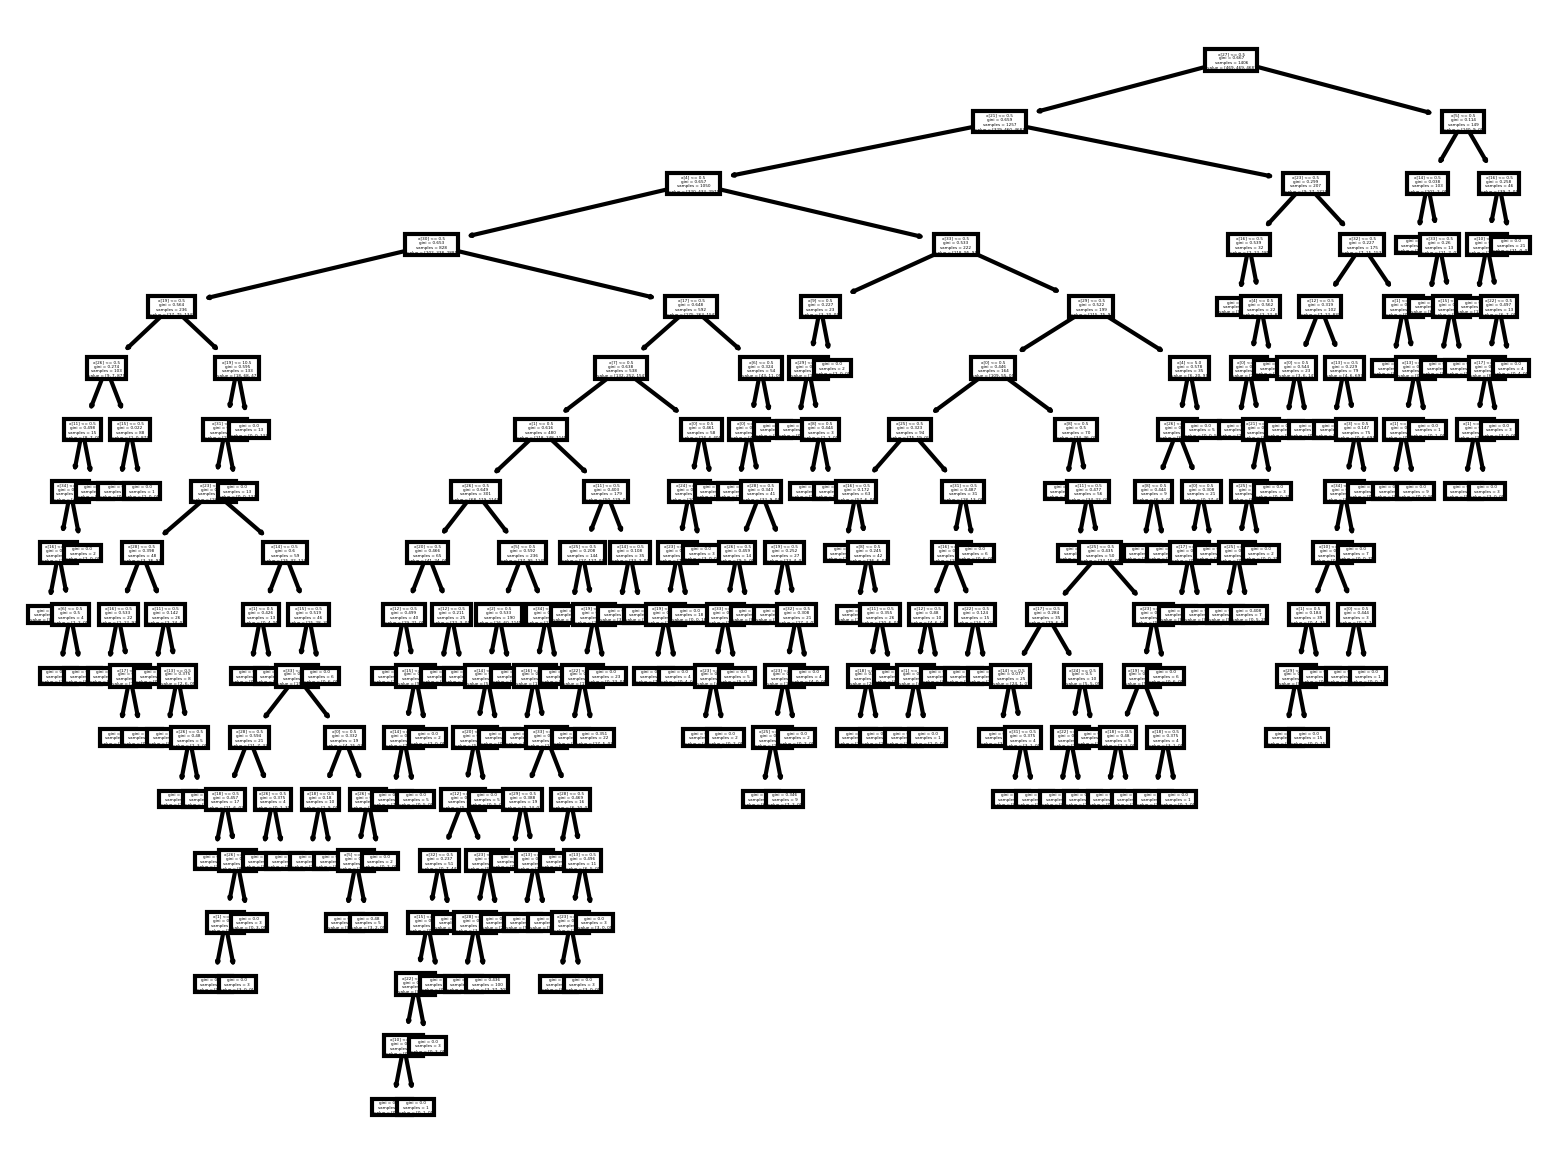


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.91      0.86      0.88       156
           2       0.93      0.96      0.94       157

    accuracy                           0.92       469
   macro avg       0.92      0.92      0.92       469
weighted avg       0.92      0.92      0.92       469


Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.92      0.86      0.89       156
           2       0.93      0.96      0.94       157

    accuracy                           0.92       469
   macro avg       0.92      0.92      0.92       469
weighted avg       0.92      0.92      0.92       469


Xgboost Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.91      0.86      0.88       156
     

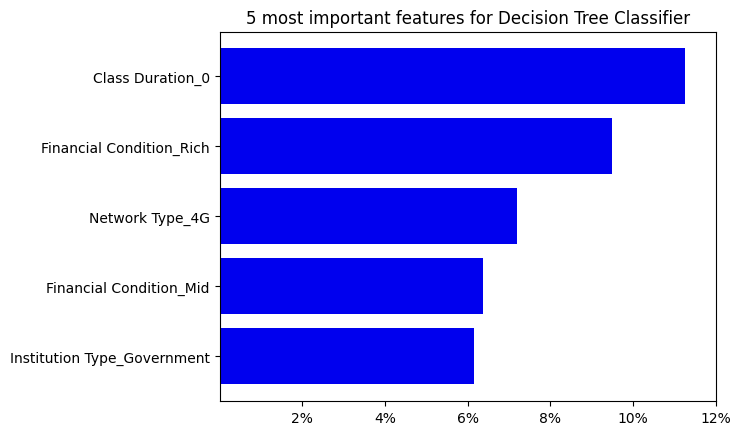

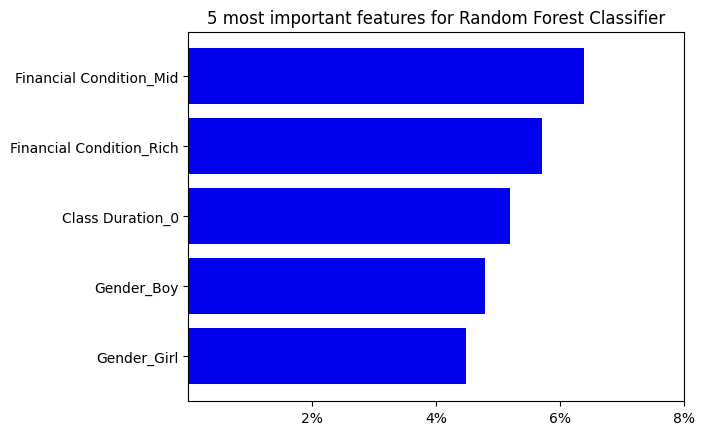

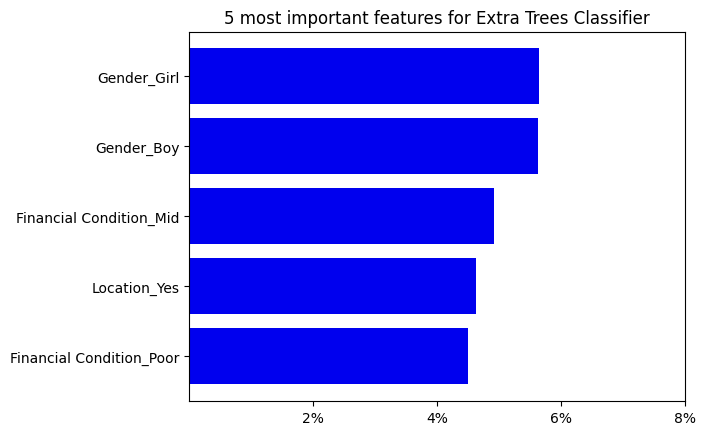

In [ ]:
smote,smote_fi=runmodels(X_train_smote,y_train_smote,X_test_smote,y_test_smote)
trpl(smote_fi)

In [ ]:
s=[]
for i in range(X.shape[1]):
    X_train_svd1=np.dot(X_train_svd[0][:,:i],np.dot(np.diag(X_train_svd[1])[:i,:i],X_train_svd[2][:i,:]))
    original_svd,_=runmodels(X_train_svd1,y_train,X_test,y_test,k=0)
    s.append(original_svd)
print('maximun accuracy in svd dataset reached it in n=',np.argmax(s)//6,'with model',models[np.argmax(s[np.argmax(s)//6])],'with score',max(s[np.argmax(s)//6]))

maximun accuracy in svd dataset reached it in n= 31 with model Random Forest Classifier with score 0.9205298013245033


In [ ]:
s=[]
for i in range(X.shape[1]):
    X_train_svd2=np.dot(X_train_svd_smote[0][:,:i],np.dot(np.diag(X_train_svd_smote[1])[:i,:i],X_train_svd_smote[2][:i,:]))
    smote_svd,_=runmodels(X_train_svd2,y_train_smote,X_test_smote,y_test_smote,k=0)
    s.append(smote_svd)
print('maximun accuracy in svd-smote dataset reached it in n=',np.argmax(s)//6,'with model',models[np.argmax(s[np.argmax(s)//6])],'with score',max(s[np.argmax(s)//6]))

maximun accuracy in svd-smote dataset reached it in n= 34 with model KNeighbors Classifier with score 0.8550106609808102



Logistic Regression
              precision    recall  f1-score   support

           0       0.36      0.07      0.12       120
           1       0.52      0.91      0.66       157
           2       0.00      0.00      0.00        25

    accuracy                           0.50       302
   macro avg       0.29      0.33      0.26       302
weighted avg       0.41      0.50      0.39       302


KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       120
           1       0.77      0.85      0.81       157
           2       0.83      0.40      0.54        25

    accuracy                           0.77       302
   macro avg       0.79      0.67      0.70       302
weighted avg       0.78      0.77      0.77       302


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       120
           1       0.80      0.82      0.81       157
     

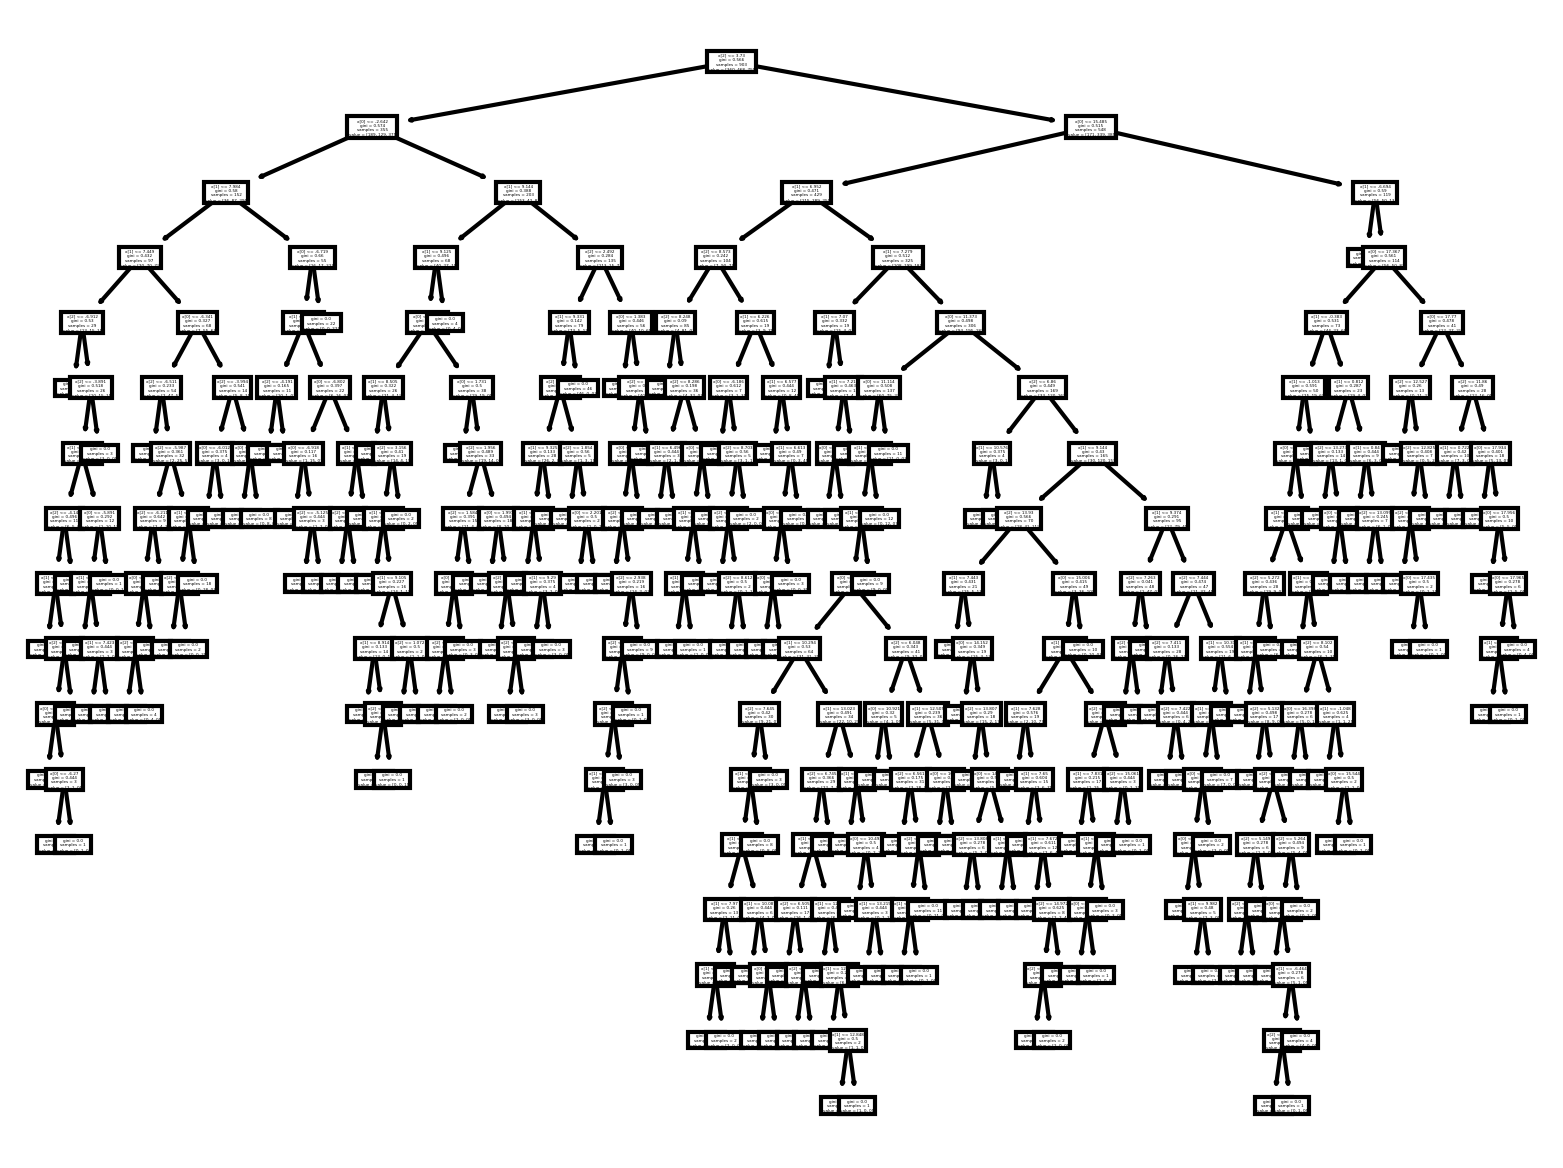


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       120
           1       0.81      0.87      0.84       157
           2       0.68      0.52      0.59        25

    accuracy                           0.82       302
   macro avg       0.78      0.73      0.75       302
weighted avg       0.82      0.82      0.82       302


Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       120
           1       0.84      0.87      0.85       157
           2       0.75      0.60      0.67        25

    accuracy                           0.84       302
   macro avg       0.81      0.77      0.79       302
weighted avg       0.84      0.84      0.84       302


Xgboost Classifier
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       120
           1       0.82      0.83      0.83       157
     

In [ ]:
original_umap,_=runmodels(X_train_umap,y_train_umap,X_test_umap,y_test_umap)


Logistic Regression
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       156
           1       0.46      0.40      0.43       156
           2       0.48      0.55      0.51       157

    accuracy                           0.50       469
   macro avg       0.50      0.50      0.50       469
weighted avg       0.50      0.50      0.50       469


KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       156
           1       0.81      0.75      0.78       156
           2       0.89      0.92      0.91       157

    accuracy                           0.84       469
   macro avg       0.83      0.84      0.83       469
weighted avg       0.83      0.84      0.83       469


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       156
           1       0.77      0.78      0.77       156
     

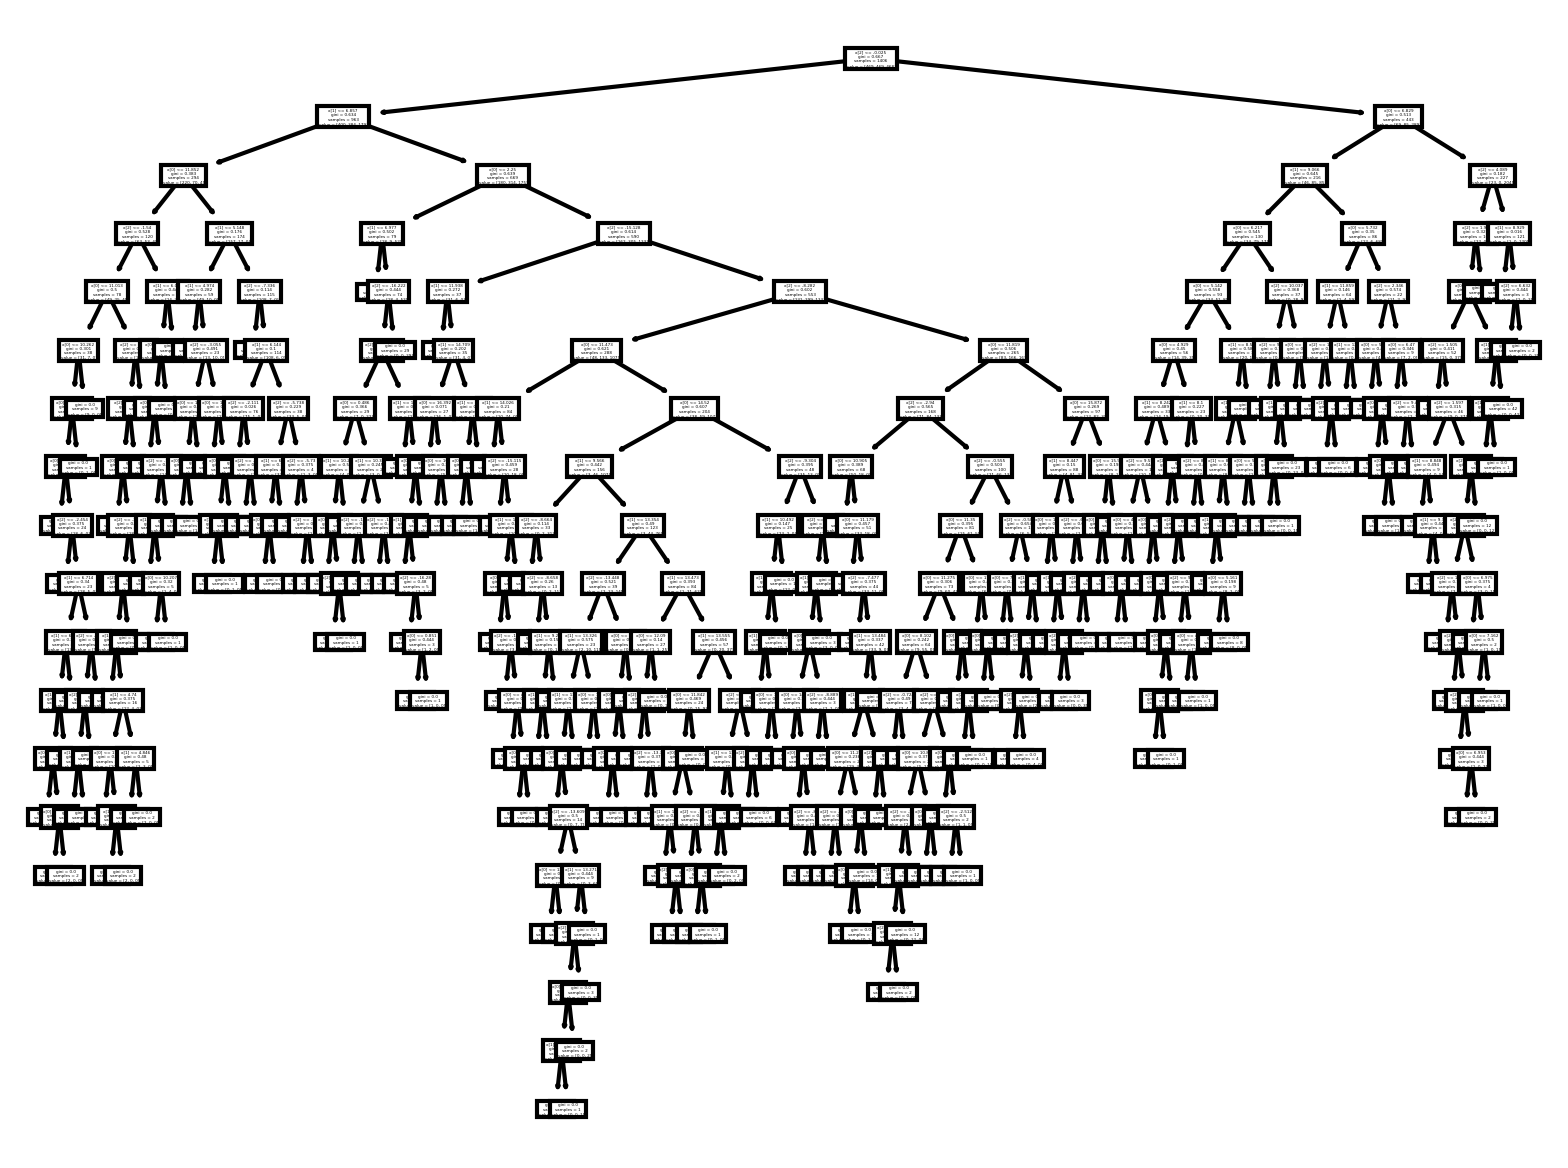


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       156
           1       0.86      0.78      0.82       156
           2       0.90      0.95      0.92       157

    accuracy                           0.87       469
   macro avg       0.87      0.87      0.87       469
weighted avg       0.87      0.87      0.87       469


Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       156
           1       0.86      0.81      0.84       156
           2       0.90      0.94      0.92       157

    accuracy                           0.88       469
   macro avg       0.88      0.88      0.88       469
weighted avg       0.88      0.88      0.88       469


Xgboost Classifier
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       156
           1       0.83      0.77      0.80       156
     

In [ ]:
smote_umap,_=runmodels(X_train_umap_smote,y_train_umap_smote,X_test_umap_smote,y_test_umap_smote)

In [ ]:
def runtunemodels(X_train,y_train,X_test,y_test):
    simplefilter("ignore", category=ConvergenceWarning)
    filterwarnings("ignore")
    model=[LogisticRegression(),KNeighborsClassifier(),tree.DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),xgb.XGBClassifier(verbosity = 0,use_label_encoder=False)]
    models=['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier','Random Forest Classifier','Extra Trees Classifier','Xgboost Classifier']
    scorestune=[]
    a=pd.DataFrame()
    i=0
    param0={'max_iter': range(400,1100,100) ,
            'solver': ['newton-cg','lbfgs'],
            'warm_start': [True, False]}
    param1={'n_neighbors': range(3,15,2)}
    param2={'max_depth': range(1,20,2),
            'min_samples_leaf': range(1,50,5),
            'criterion': ["gini", "entropy"],
            'splitter': ['best', 'random'],
            'max_features': ['auto']}
    param3={'n_estimators': range(100,200,10),
            'bootstrap': [True, False]}
    param4={'n_estimators': range(100,200,10),
            'bootstrap': [True, False]}
    param5={'n_estimators': range(100,200,10),
            'max_delta_step':[0,1,2]}
    gs0=GridSearchCV(model[0],param0,cv=5,n_jobs=-1)
    gs1=GridSearchCV(model[1],param1,cv=5,n_jobs=-1)
    gs2=GridSearchCV(model[2],param2,cv=5,n_jobs=-1)
    gs3=GridSearchCV(model[3],param3,cv=5,n_jobs=-1)
    gs4=GridSearchCV(model[4],param4,cv=5,n_jobs=-1)
    gs5=GridSearchCV(model[5],param5,cv=5,n_jobs=-1)
    scorestune=[]
    be=[]
    for m in model:
        if str(m)=='LogisticRegression()':
            my=gs0.fit(X_train,y_train.values.ravel())
            be.append(my.best_estimator_)

            scorestune.append(my.best_score_)
            print('\n',models[i],sep='')
            i+=1
            print(classification_report(y_test,my.predict(X_test)))
        elif str(m)=='KNeighborsClassifier()':
            my=gs1.fit(X_train,y_train.values.ravel())
            be.append(my.best_estimator_)

            scorestune.append(my.best_score_)
            print('\n',models[i],sep='')
            i+=1
            print(classification_report(y_test,my.predict(X_test)))
        elif str(m)=='DecisionTreeClassifier()':
            my=gs2.fit(X_train,y_train.values.ravel())
            be.append(my.best_estimator_)

            scorestune.append(my.best_score_)
            a[models[i]]=my.best_estimator_.feature_importances_
            print('\n',models[i],sep='')
            i+=1
            print(classification_report(y_test,my.predict(X_test)))
            plt.figure(dpi=300)
            tree.plot_tree(my.best_estimator_)
            plt.show()
        elif str(m)=='RandomForestClassifier()':
            my=gs3.fit(X_train,y_train.values.ravel())
            be.append(my.best_estimator_)

            scorestune.append(my.best_score_)
            a[models[i]]=my.best_estimator_.feature_importances_
            print('\n',models[i],sep='')
            i+=1
            print(classification_report(y_test,my.predict(X_test)))
        elif str(m)=='ExtraTreesClassifier()':
            my=gs4.fit(X_train,y_train.values.ravel())
            be.append(my.best_estimator_)

            scorestune.append(my.best_score_)
            a[models[i]]=my.best_estimator_.feature_importances_
            print('\n',models[i],sep='')
            i+=1
            print(classification_report(y_test,my.predict(X_test)))
        elif m==model[5]:
            my=gs5.fit(X_train,y_train.values.ravel())
            be.append(my.best_estimator_)

            scorestune.append(my.best_score_)
            print('\n',models[i],sep='')
            i+=1
            print(classification_report(y_test,my.predict(X_test)))
    a=a.set_index(X.columns)
    return scorestune,be,a


Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       120
           1       0.70      0.85      0.77       157
           2       0.92      0.44      0.59        25

    accuracy                           0.72       302
   macro avg       0.79      0.63      0.68       302
weighted avg       0.73      0.72      0.72       302


KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       120
           1       0.84      0.89      0.86       157
           2       0.80      0.64      0.71        25

    accuracy                           0.84       302
   macro avg       0.83      0.79      0.81       302
weighted avg       0.84      0.84      0.84       302


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.92      0.93      0.93       157
     

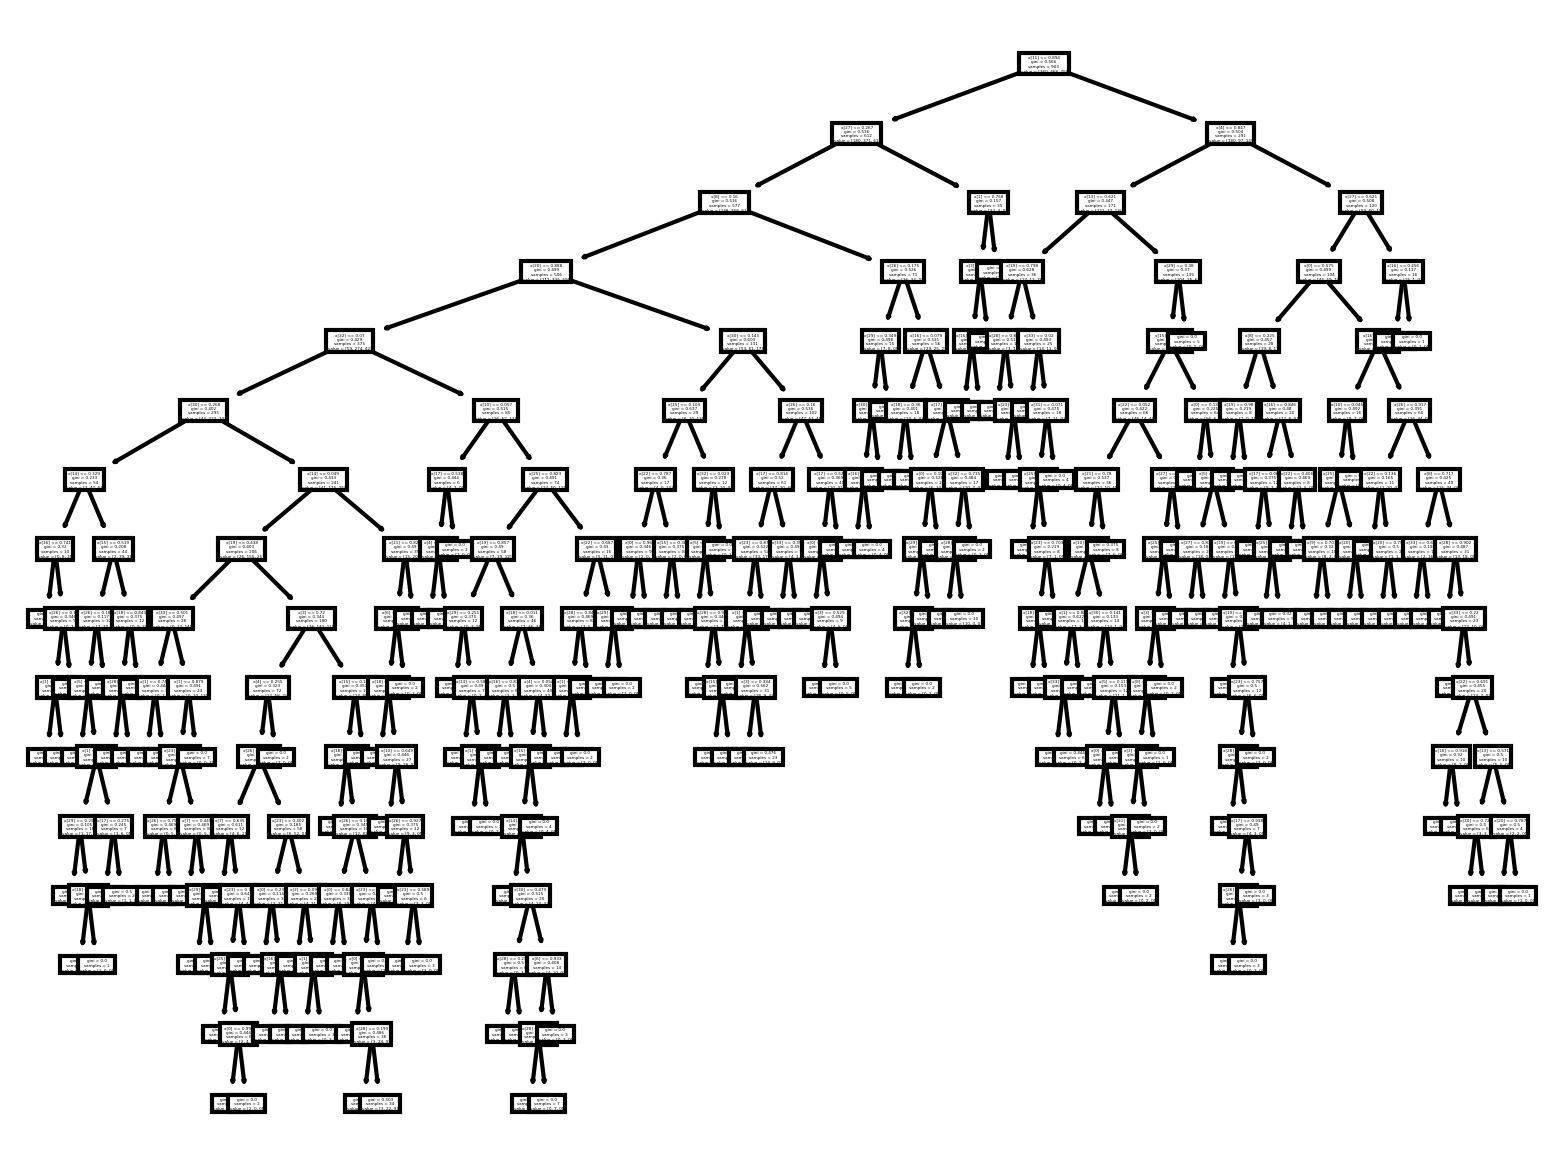


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.92      0.93      0.93       157
           2       0.86      0.76      0.81        25

    accuracy                           0.92       302
   macro avg       0.90      0.87      0.89       302
weighted avg       0.92      0.92      0.92       302


Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       120
           1       0.90      0.94      0.92       157
           2       0.86      0.76      0.81        25

    accuracy                           0.91       302
   macro avg       0.90      0.87      0.88       302
weighted avg       0.91      0.91      0.91       302


Xgboost Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.92      0.93      0.93       157
     

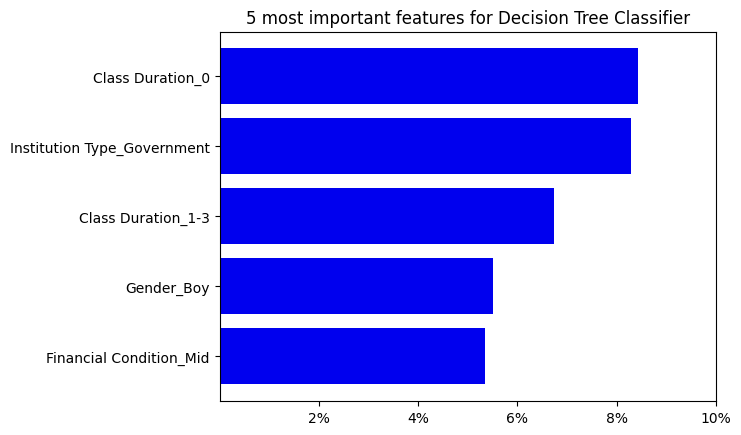

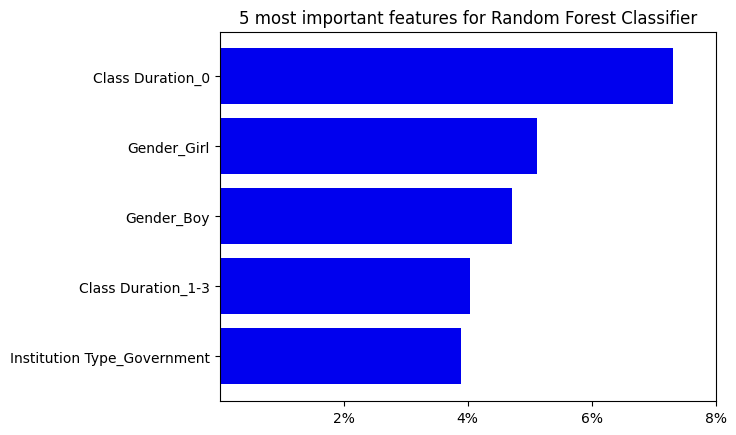

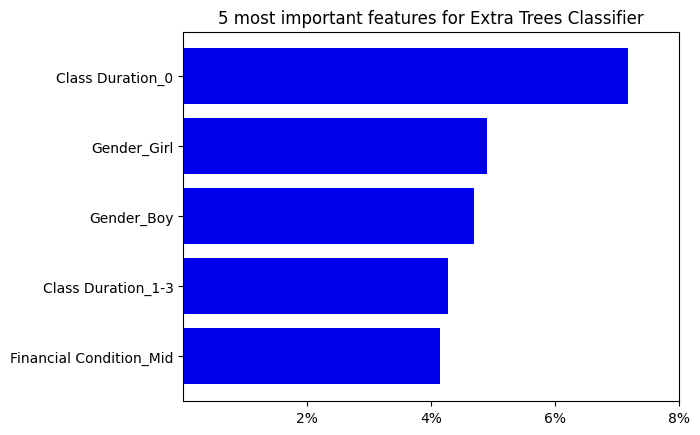

In [ ]:
original_tune,original_tune_be,original_tune_fi=runtunemodels(X_train,y_train,X_test,y_test)
trpl(original_tune_fi)


Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       156
           1       0.61      0.67      0.64       156
           2       0.76      0.82      0.79       157

    accuracy                           0.69       469
   macro avg       0.69      0.69      0.69       469
weighted avg       0.69      0.69      0.69       469


KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       156
           1       0.84      0.86      0.85       156
           2       0.90      0.96      0.93       157

    accuracy                           0.88       469
   macro avg       0.88      0.88      0.88       469
weighted avg       0.88      0.88      0.88       469


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.92      0.87      0.89       156
     

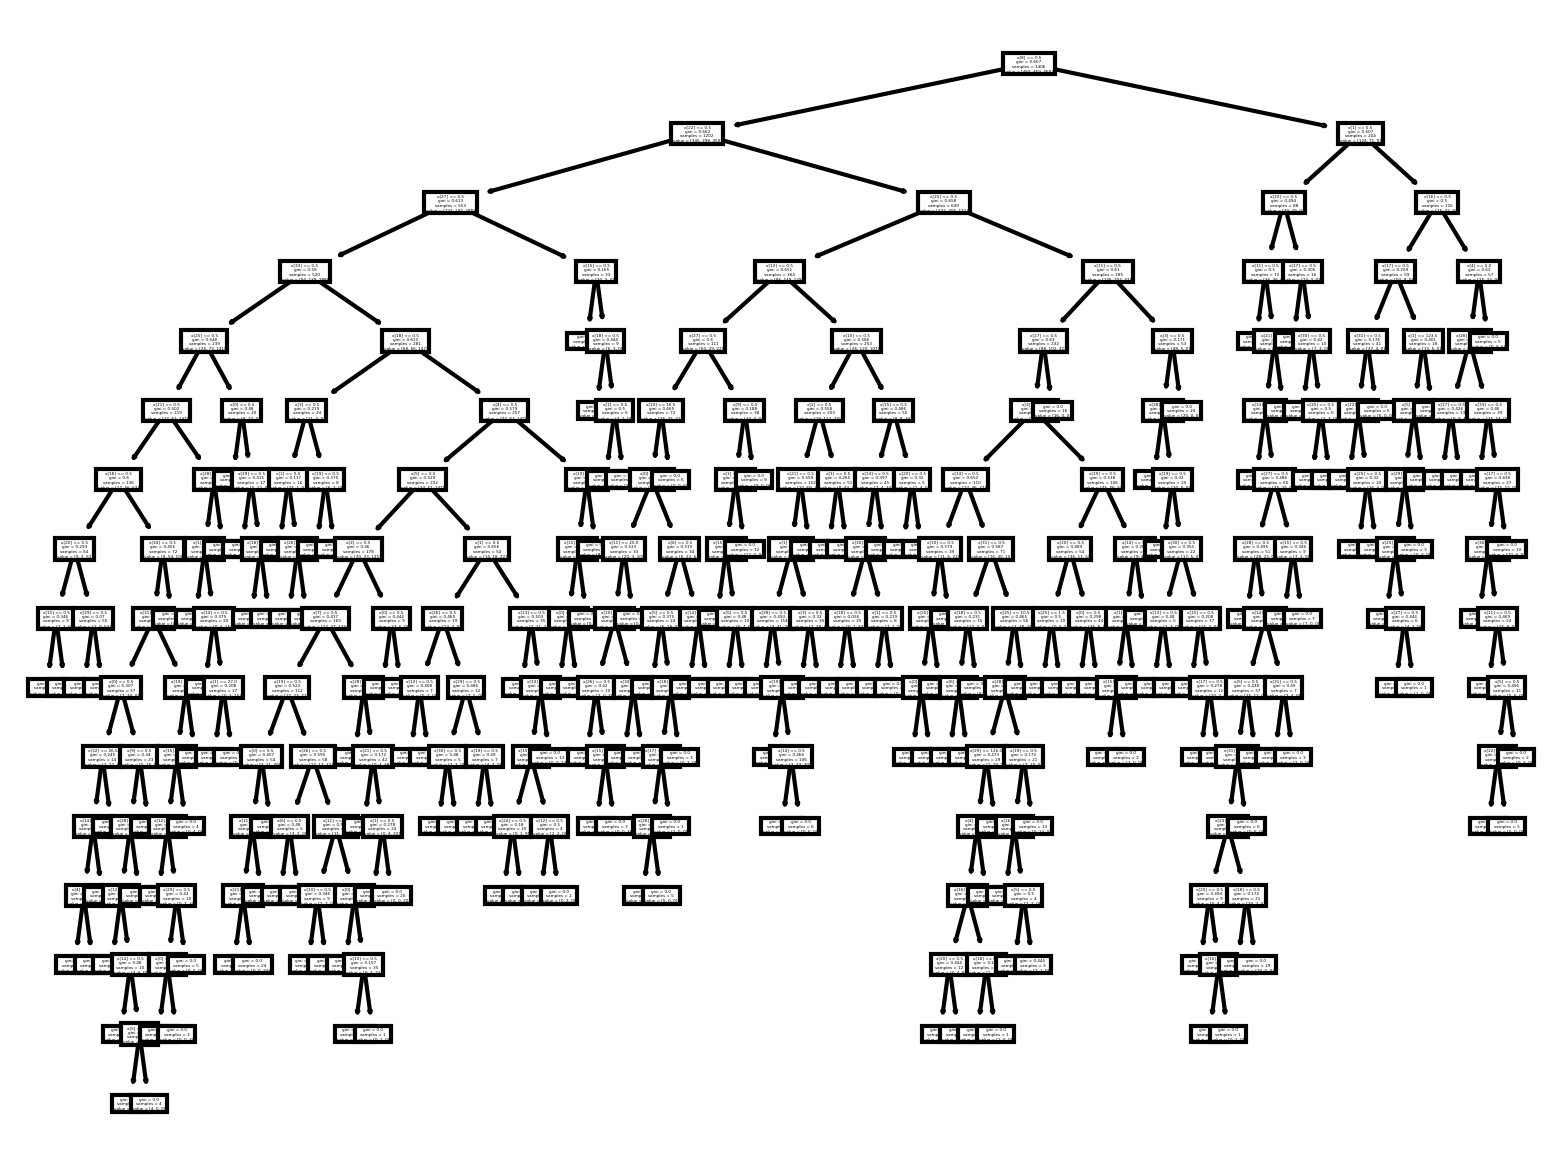


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.91      0.86      0.88       156
           2       0.93      0.96      0.94       157

    accuracy                           0.92       469
   macro avg       0.92      0.92      0.92       469
weighted avg       0.92      0.92      0.92       469


Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.91      0.86      0.88       156
           2       0.93      0.96      0.94       157

    accuracy                           0.92       469
   macro avg       0.92      0.92      0.92       469
weighted avg       0.92      0.92      0.92       469


Xgboost Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.91      0.86      0.88       156
     

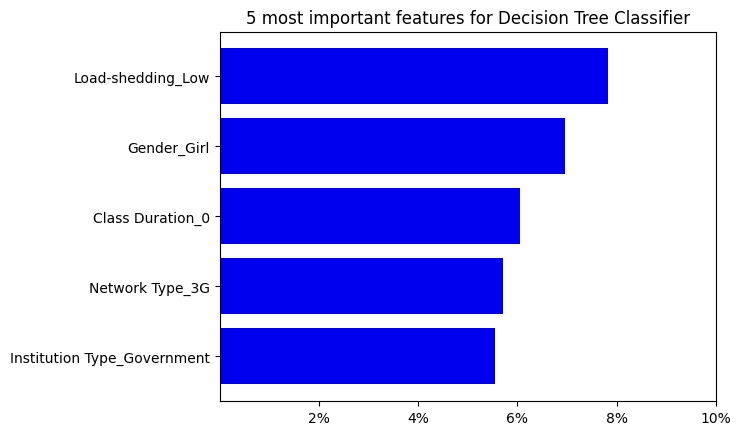

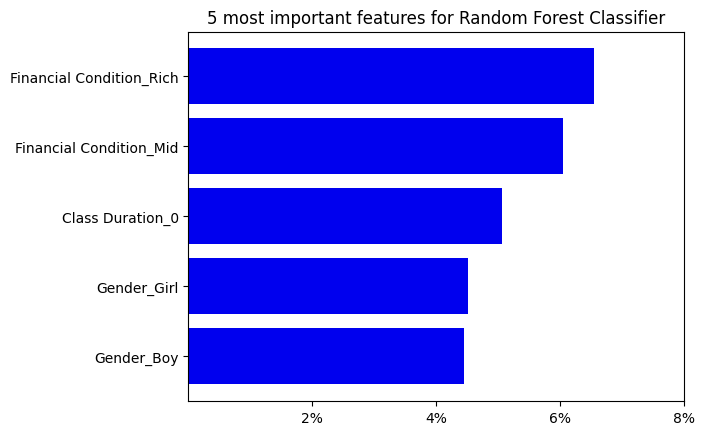

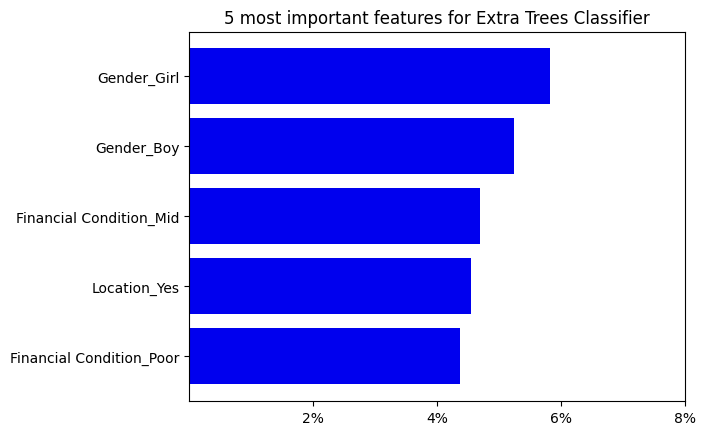

In [ ]:
smote_tune,smote_tune_be,smote_tune_fi=runtunemodels(X_train_smote,y_train_smote,X_test_smote,y_test_smote)
trpl(smote_tune_fi)

In [ ]:
from sklearn.neural_network import MLPClassifier
def nn(X_train,y_train,X_test,y_test,k=1):
    m=MLPClassifier()
    my=m.fit(X_train,y_train.values.ravel())
    if k==1:
        print('\nNeural Network')
        print(classification_report(y_test,my.predict(X_test)))
    return my.score(X_test,y_test)

In [ ]:
nn(X_train,y_train,X_test,y_test)


Neural Network
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       120
           1       0.88      0.95      0.91       157
           2       0.89      0.68      0.77        25

    accuracy                           0.90       302
   macro avg       0.90      0.83      0.86       302
weighted avg       0.90      0.90      0.90       302



0.8973509933774835

In [ ]:
nn(X_train_smote,y_train_smote,X_test_smote,y_test_smote)


Neural Network
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       156
           1       0.79      0.79      0.79       156
           2       0.87      0.93      0.90       157

    accuracy                           0.84       469
   macro avg       0.84      0.84      0.84       469
weighted avg       0.84      0.84      0.84       469



0.8443496801705757

In [ ]:
s=[]
for i in range(X.shape[1]):
    X_train_svd1=np.dot(X_train_svd[0][:,:i],np.dot(np.diag(X_train_svd[1])[:i,:i],X_train_svd[2][:i,:]))
    original_svd=nn(X_train_svd1,y_train,X_test,y_test,k=0)
    s.append(original_svd)
print('maximun accuracy in svd dataset reached it in n=',np.argmax(s),'in Neural Network with score',s[np.argmax(s)])

maximun accuracy in svd dataset reached it in n= 31 in Neural Network with score 0.9139072847682119


In [ ]:
s=[]
for i in range(X.shape[1]):
    X_train_svd2=np.dot(X_train_svd_smote[0][:,:i],np.dot(np.diag(X_train_svd_smote[1])[:i,:i],X_train_svd_smote[2][:i,:]))
    smote_svd=nn(X_train_svd2,y_train_smote,X_test_smote,y_test_smote,k=0)
    s.append(smote_svd)
print('maximun accuracy in svd-smote dataset reached it in n=',np.argmax(s),'in Neural Network with score',s[np.argmax(s)])

maximun accuracy in svd-smote dataset reached it in n= 34 in Neural Network with score 0.8208955223880597


In [ ]:
def nntune(X_train,y_train,X_test,y_test):
    stune=[]
    be=[]
    m=MLPClassifier()
    parameters= {'solver': ['lbfgs','adam'],
                 'max_iter': range(200,1000,100),
                 'alpha': 10.0 ** -np.arange(2,6),
                 'activation': ['relu','tanh'],
                 'hidden_layer_sizes':[[11,],[12,],[24,],[25,],[56,],[75,],[100,],[128,]]
                 }
    my=RandomizedSearchCV(m,parameters,cv=5,n_jobs=-1)
    my.fit(X_train,y_train.values.ravel())
    stune.append(my.best_score_)
    be.append(my.best_estimator_)
    print('\nNeural Network')
    print(classification_report(y_test,my.predict(X_test)))
    cm=confusion_matrix(y_test,my.predict(X_test))
    disp=ConfusionMatrixDisplay(cm,display_labels=['Low','Moderate','High'])
    disp.plot(cmap='plasma')
    plt.show()
    return stune,be


Neural Network
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       120
           1       0.92      0.93      0.93       157
           2       0.84      0.84      0.84        25

    accuracy                           0.92       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.92      0.92      0.92       302



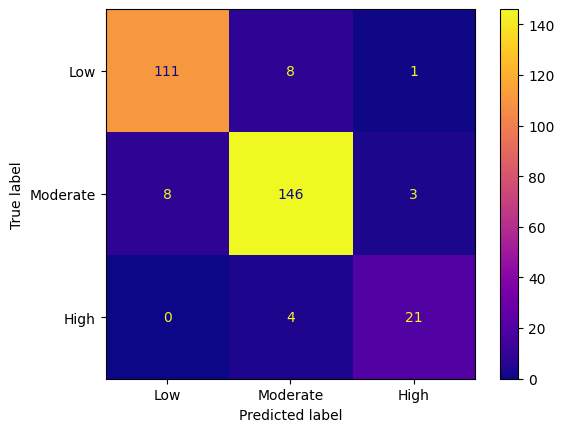

([0.8969858809085329],
 [MLPClassifier(alpha=1e-05, hidden_layer_sizes=[56], max_iter=800)])

In [ ]:
nntune(X_train,y_train,X_test,y_test)


Neural Network
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       156
           1       0.93      0.85      0.89       156
           2       0.91      0.97      0.94       157

    accuracy                           0.92       469
   macro avg       0.92      0.92      0.92       469
weighted avg       0.92      0.92      0.92       469



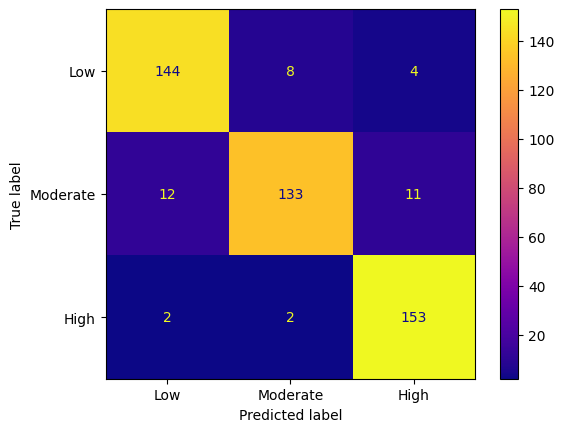

([0.903975164685394],
 [MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=[25],
                max_iter=800, solver='lbfgs')])

In [ ]:
nntune(X_train_smote,y_train_smote,X_test_smote,y_test_smote)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OrdinalEncoder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X=ALL.drop(columns='Adaptivity Level')
col=X.columns
enc = OrdinalEncoder()
X=enc.fit_transform(X) #with Ordinal Encoder not ohe
pd.DataFrame(X,columns=col).head(7)

X_smote,y_smote=SMOTE().fit_resample(X,Y)

In [ ]:
input=tf.keras.Input(shape=(13,))
x1=keras.layers.Dense(256, activation='relu')(input)
x2=keras.layers.Dense(128, activation='relu')(x1)
x3=keras.layers.Dense(64, activation='relu')(x2)
x4=keras.layers.Dense(32, activation='relu')(x3)
x5=keras.layers.Dense(16, activation='relu')(x4)
output=keras.layers.Dense(3,activation='softmax')(x5)

model2=keras.Model(inputs=input,outputs=output)

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51    

In [ ]:
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
m2=model2.fit(X_smote,y_smote,validation_split=0.11,epochs=150,use_multiprocessing=True,batch_size=256)     #89%-11% split train-test

Epoch 1/150
7/7 [==============================] - 2s 53ms/step - loss: 1.0550 - accuracy: 0.3723 - val_loss: 1.1981 - val_accuracy: 0.0483
Epoch 2/150
7/7 [==============================] - 0s 13ms/step - loss: 0.9776 - accuracy: 0.4658 - val_loss: 1.2546 - val_accuracy: 0.2947
Epoch 3/150
7/7 [==============================] - 0s 12ms/step - loss: 0.9063 - accuracy: 0.6571 - val_loss: 1.1077 - val_accuracy: 0.5942
Epoch 4/150
7/7 [==============================] - 0s 11ms/step - loss: 0.8388 - accuracy: 0.6894 - val_loss: 0.8606 - val_accuracy: 0.6812
Epoch 5/150
7/7 [==============================] - 0s 12ms/step - loss: 0.7774 - accuracy: 0.7026 - val_loss: 0.7921 - val_accuracy: 0.6618
Epoch 6/150
7/7 [==============================] - 0s 13ms/step - loss: 0.7252 - accuracy: 0.7050 - val_loss: 0.6593 - val_accuracy: 0.7150
Epoch 7/150
7/7 [==============================] - 0s 14ms/step - loss: 0.6895 - accuracy: 0.7134 - val_loss: 0.6477 - val_accuracy: 0.6957
Epoch 8/150
7/7 [===

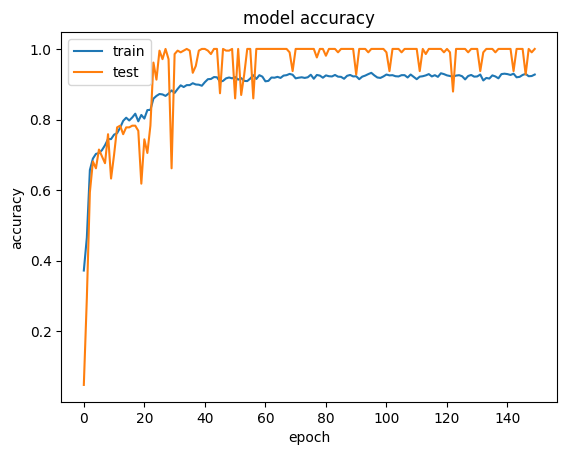

Epoch with higher accuracy in train: 95
Higher accuracy in train: 93.22541952133179
Epoch with higher accuracy in test: 27
Higher accuracy in test: 100.0


In [ ]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print('Epoch with higher accuracy in train:',np.argmax(m2.history['accuracy']))
print('Higher accuracy in train:',m2.history['accuracy'][np.argmax(m2.history['accuracy'])]*100)
print('Epoch with higher accuracy in test:',np.argmax(m2.history['val_accuracy']))
print('Higher accuracy in test:',m2.history['val_accuracy'][np.argmax(m2.history['val_accuracy'])]*100)

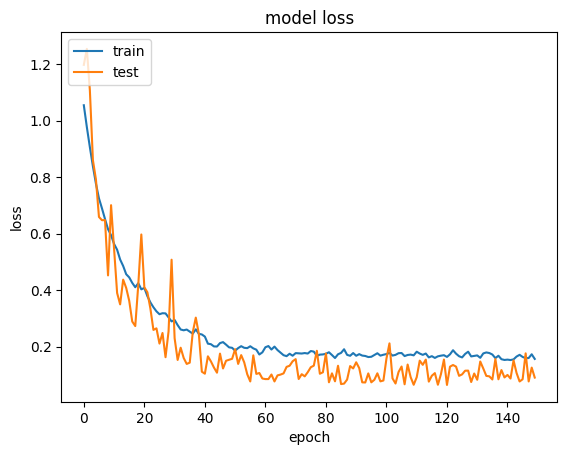

Epoch with best Sparse Categorical Cross entropy loss for train in: 141
Best Sparse Categorical Cross entropy loss for train: 0.15223118662834167
Epoch with best Sparse Categorical Cross entropy loss for test in: 120
Best Sparse Categorical Cross entropy loss for test: 0.06405932456254959


In [ ]:
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print('Epoch with best Sparse Categorical Cross entropy loss for train in:',np.argmin(m2.history['loss']))
print('Best Sparse Categorical Cross entropy loss for train:',m2.history['loss'][np.argmin(m2.history['loss'])])
print('Epoch with best Sparse Categorical Cross entropy loss for test in:',np.argmin(m2.history['val_loss']))
print('Best Sparse Categorical Cross entropy loss for test:',m2.history['val_loss'][np.argmin(m2.history['val_loss'])])